/var/folders/f9/_2pp5jn96pq246z7mx7nk3lr0000gn/T/ipykernel_41123/4263489147.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df, ignore_index=True)
/var/folders/f9/_2pp5jn96pq246z7mx7nk3lr0000gn/T/ipykernel_41123/4263489147.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df, ignore_index=True)
/var/folders/f9/_2pp5jn96pq246z7mx7nk3lr0000gn/T/ipykernel_41123/4263489147.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df, ignore_index=True)
/var/folders/f9/_2pp5jn96pq246z7mx7nk3lr0000gn/T/ipykernel_41123/4263489147.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  da

                     dataset  ddg_skewness  ee_skewness  skewness_diff
0             Sunoj_PNAS.csv     -0.041673    -3.237616       3.195943
1           Denmark_OPRD.csv     -0.680743    -1.162204       0.481461
2        Denmark_Science.csv      0.727169    -0.748722       1.475891
3   HongAckermann_NatSyn.csv     -0.536290    -1.490751       0.954461
4             Doyle_JACS.csv      0.284708     0.034736       0.249972
5    SigmanToste_Science.csv      0.052230    -1.075459       1.127689
6   SigmanBiscoe_Science.csv     -1.051473    -1.995183       0.943710
7       SigmanToste_JACS.csv      0.402950    -0.147425       0.550376
8              Sunoj_JPC.csv     -0.390582    -3.539835       3.149253
9          List_ACIE_THF.csv     -0.416311    -0.285653       0.130658
10         List_ACIE_THP.csv     -0.059660    -0.064674       0.005014


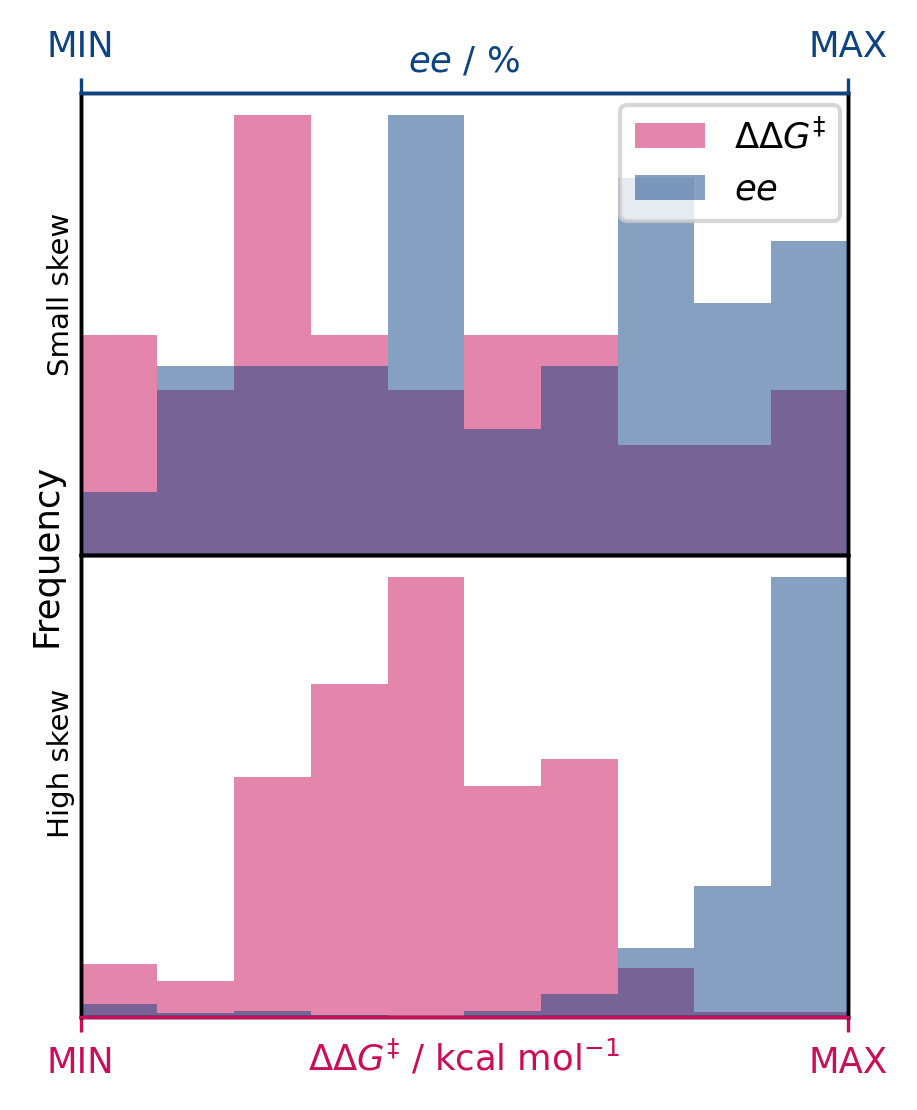

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

fontsize = 8.5
sec_fontsize = 7
y_label_pos = 0.5
space_between_plots = 0.0
legendx = 0.91
legendy = 0.885

gensch_palette = ['#0C4383',
                '#22A0B6',
                '#46E0A6',
                '#7B1346',
                '#CB0C59']
plt.style.use('default')
plt.rcParams['font.size'] =fontsize

# List all csv files in the orig_data folder
csv_files = [f for f in os.listdir('../code/datasets_230520') if f.endswith('.csv')]

# Initialize an empty DataFrame to store data
data = pd.DataFrame()

# Initialize an empty list to store skewness information
skewness_info = []

# Read each csv file and calculate the skewness
for file in csv_files:
    df = pd.read_csv(f'../code/datasets_230520/{file}')
    df['dataset'] = file  # Add a column to indicate the dataset
    # Append the data to the DataFrame
    data = data.append(df, ignore_index=True)
    skewness_info.append((file, skew(df['ddg']), skew(df['ee'])))

# Convert the skewness information into a DataFrame
skewness_df = pd.DataFrame(skewness_info, columns=['dataset', 'ddg_skewness', 'ee_skewness'])

# Sort the DataFrame by the absolute difference in skewness
skewness_df['skewness_diff'] = abs(skewness_df['ddg_skewness'] - skewness_df['ee_skewness'])

print(skewness_df)

subset_max = pd.read_csv('../code/datasets_230520/Sunoj_PNAS.csv')
subset_max['ee'] = subset_max['ee'].apply(lambda x: abs(x))
subset_max['ddg'] = subset_max['ddg'].apply(lambda x: abs(x))

subset_min = pd.read_csv('../code/datasets_230520/SigmanToste_JACS.csv')
subset_min['ee'] = subset_min['ee'].apply(lambda x: abs(x))
subset_min['ddg'] = subset_min['ddg'].apply(lambda x: abs(x))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.3, 4), dpi=300)

ax1_2 = ax1.twinx().twiny()
ax2_2 = ax2.twinx().twiny()

# Create invisible axes for global ylabel
ax = fig.add_subplot(111, frame_on=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel("Frequency", labelpad=y_label_pos)  # Label pad adjusts the position of the ylabel

# axes 1

subset_min['ddg'].plot.hist(ax=ax1, label=r'$\Delta \Delta G^‡$', alpha=0.5, color=gensch_palette[4])
subset_min['ee'].plot.hist(ax=ax1_2, label=f'$ee$',  alpha=0.5, color=gensch_palette[0])

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1_2.set_ylabel('')
ax1_2.yaxis.set_label_position('left')

ax1.xaxis.set_ticks_position('bottom')
ax1.set_yticks([])

ax1.set_xlim([subset_min['ddg'].min(), subset_min['ddg'].max()])
ax1.set_xticks([])

ax1_2.set_xlabel(r'$ee$ / %', color=gensch_palette[0])
ax1_2.xaxis.labelpad = -10
ax1_2.xaxis.set_ticks_position('top')
ax1_2.set_yticks([])
ax1_2.set_xticks([subset_min['ee'].min(), subset_min['ee'].max()])
ax1_2.set_xticklabels(['MIN', 'MAX'])
ax1_2.set_xlim([subset_min['ee'].min(), subset_min['ee'].max()])

for tick in ax1_2.get_xticklabels():
    tick.set_color(gensch_palette[0])

ax1_2.spines['top'].set_color(gensch_palette[0])
ax1.spines['top'].set_color(gensch_palette[0])
ax1_2.tick_params(axis='x', colors=gensch_palette[0])

fig.legend(bbox_to_anchor=(legendx, legendy))

# axes 2

subset_max['ddg'].plot.hist(ax=ax2, label=r'$\Delta \Delta G^‡$', alpha=0.5, color=gensch_palette[4])
subset_max['ee'].plot.hist(ax=ax2_2, label=f'$ee$',  alpha=0.5, color=gensch_palette[0])

ax2.set_xlabel(r'$\Delta \Delta G^‡$ / kcal mol$^{-1}$', color=gensch_palette[4])
# change distance to x axis
ax2.xaxis.labelpad = -10

ax2.set_xlim(0, 4)
ax2.set_xticks([subset_max['ddg'].min(), subset_max['ddg'].max()])
ax2_2.set_xlabel('')
ax2_2.set_xticks([])

ax2.set_ylabel('')
ax2.set_yticks([])
ax2_2.set_yticks([])
ax2_2.set_ylabel('')

for tick in ax2.get_xticklabels():
    tick.set_color(gensch_palette[4])
ax2_2.spines['bottom'].set_color(gensch_palette[4])
ax2.tick_params(axis='x', colors=gensch_palette[4])
ax2_2.set_xlim([subset_max['ee'].min(), subset_max['ee'].max()])
ax2.set_xlim([subset_max['ddg'].min(), subset_max['ddg'].max()])
ax2.set_xticklabels(['MIN', 'MAX'])

plt.subplots_adjust(hspace=space_between_plots)

plt.text(-0.025, 0.2, 'High skew', ha='center', rotation='vertical', fontsize=sec_fontsize, color='black')
plt.text(-0.025, 0.7, 'Small skew', ha='center',  rotation='vertical', fontsize=sec_fontsize, color='black')

plt.savefig('Fig3.png', dpi=300, bbox_inches='tight')
plt.show()


Splitted

/var/folders/f9/_2pp5jn96pq246z7mx7nk3lr0000gn/T/ipykernel_41123/3358373605.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df, ignore_index=True)
/var/folders/f9/_2pp5jn96pq246z7mx7nk3lr0000gn/T/ipykernel_41123/3358373605.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df, ignore_index=True)
/var/folders/f9/_2pp5jn96pq246z7mx7nk3lr0000gn/T/ipykernel_41123/3358373605.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df, ignore_index=True)
/var/folders/f9/_2pp5jn96pq246z7mx7nk3lr0000gn/T/ipykernel_41123/3358373605.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  da

                     dataset  ddg_skewness  ee_skewness  skewness_diff
0             Sunoj_PNAS.csv     -0.041673    -3.237616       3.195943
1           Denmark_OPRD.csv     -0.680743    -1.162204       0.481461
2        Denmark_Science.csv      0.727169    -0.748722       1.475891
3   HongAckermann_NatSyn.csv     -0.536290    -1.490751       0.954461
4             Doyle_JACS.csv      0.284708     0.034736       0.249972
5    SigmanToste_Science.csv      0.052230    -1.075459       1.127689
6   SigmanBiscoe_Science.csv     -1.051473    -1.995183       0.943710
7       SigmanToste_JACS.csv      0.402950    -0.147425       0.550376
8              Sunoj_JPC.csv     -0.390582    -3.539835       3.149253
9          List_ACIE_THF.csv     -0.416311    -0.285653       0.130658
10         List_ACIE_THP.csv     -0.059660    -0.064674       0.005014


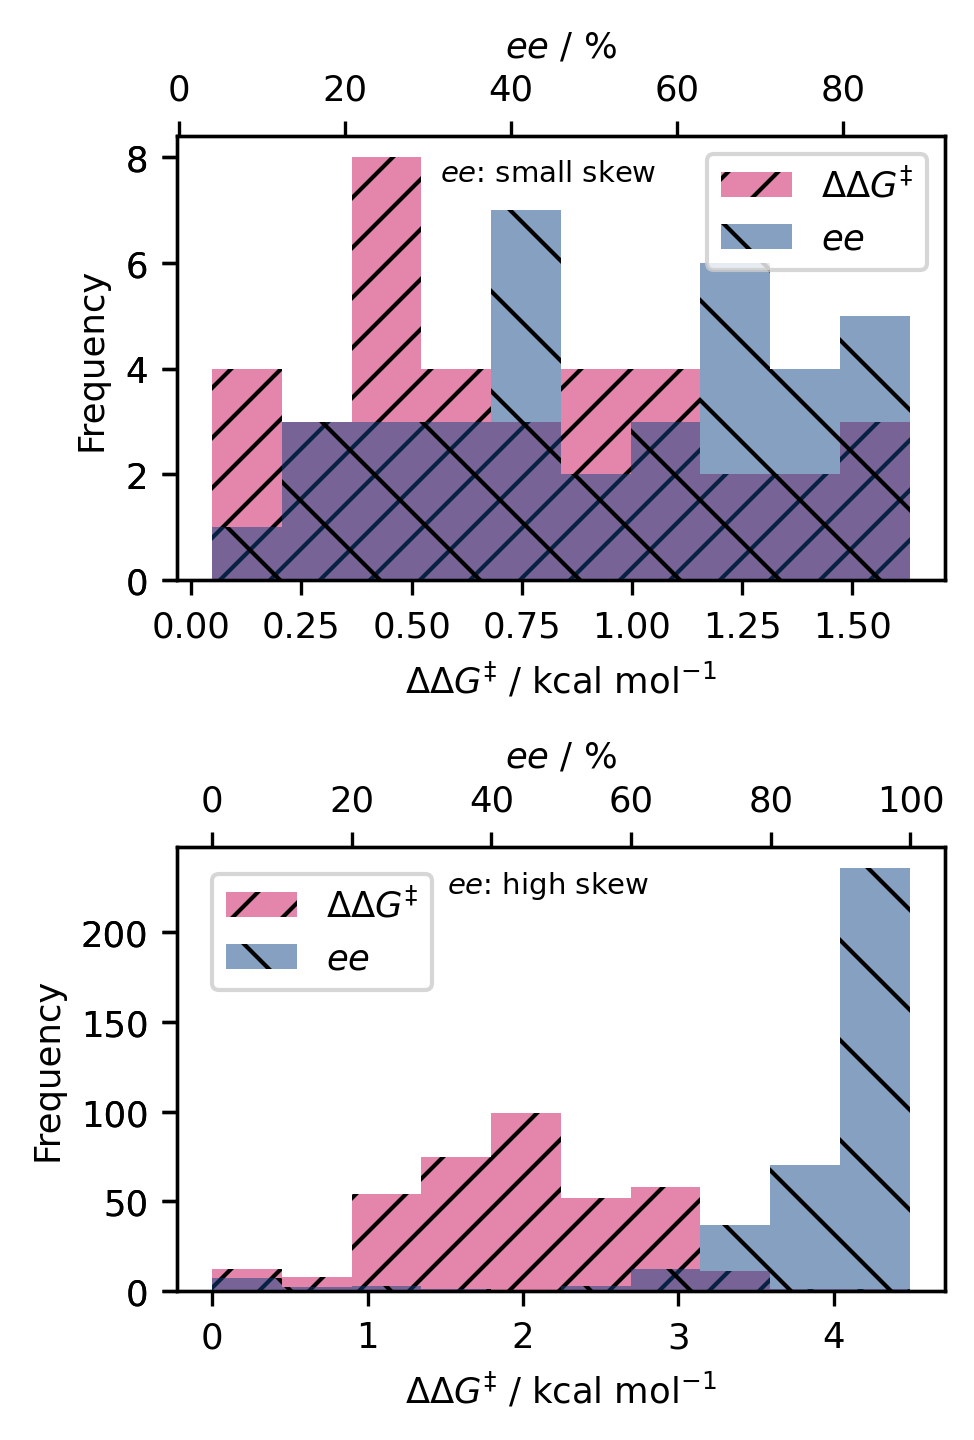

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

fontsize = 8.5
sec_fontsize = 7
y_label_pos = 0.5
space_between_plots = 0.6
legendx = 0.90
legendy = 0.88

gensch_palette = ['#0C4383',
                '#22A0B6',
                '#46E0A6',
                '#7B1346',
                '#CB0C59']
plt.style.use('default')
plt.rcParams['font.size'] =fontsize

# List all csv files in the orig_data folder
csv_files = [f for f in os.listdir('../code/datasets_230520') if f.endswith('.csv')]

# Initialize an empty DataFrame to store data
data = pd.DataFrame()

# Initialize an empty list to store skewness information
skewness_info = []

# Read each csv file and calculate the skewness
for file in csv_files:
    df = pd.read_csv(f'../code/datasets_230520/{file}')
    df['dataset'] = file  # Add a column to indicate the dataset
    # Append the data to the DataFrame
    data = data.append(df, ignore_index=True)
    skewness_info.append((file, skew(df['ddg']), skew(df['ee'])))

# Convert the skewness information into a DataFrame
skewness_df = pd.DataFrame(skewness_info, columns=['dataset', 'ddg_skewness', 'ee_skewness'])

# Sort the DataFrame by the absolute difference in skewness
skewness_df['skewness_diff'] = abs(skewness_df['ddg_skewness'] - skewness_df['ee_skewness'])

print(skewness_df)

subset_max = pd.read_csv('../code/datasets_230520/Sunoj_PNAS.csv')
subset_max['ee'] = subset_max['ee'].apply(lambda x: abs(x))
subset_max['ddg'] = subset_max['ddg'].apply(lambda x: abs(x))

subset_min = pd.read_csv('../code/datasets_230520/SigmanToste_JACS.csv')
subset_min['ee'] = subset_min['ee'].apply(lambda x: abs(x))
subset_min['ddg'] = subset_min['ddg'].apply(lambda x: abs(x))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.3, 5), dpi=300)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax1_2 = ax1.twiny()
ax2_2 = ax2.twiny()


# increase distance between both plots
plt.subplots_adjust(hspace=space_between_plots)

# axes 1
subset_min['ddg'].plot.hist(ax=ax1, label=r'$\Delta \Delta G^‡$', alpha=0.5, color=gensch_palette[4], hatch='//')
subset_min['ee'].plot.hist(ax=ax1_2, label=f'$ee$',  alpha=0.5, color=gensch_palette[0], hatch='\\')

fig.legend(bbox_to_anchor=(legendx, legendy))
fig.legend(bbox_to_anchor=(0.4, 0.4))

ax1.set_xlabel(r'$\Delta \Delta G^‡$ / kcal mol$^{-1}$',fontsize=fontsize)
ax1_2.set_xlabel(r'$ee$ / %', fontsize=fontsize)
ax1_2.set_ylabel('')


subset_max['ddg'].plot.hist(ax=ax2, label=r'$\Delta \Delta G^‡$', alpha=0.5, color=gensch_palette[4], hatch='//')
subset_max['ee'].plot.hist(ax=ax2_2, label=f'$ee$',  alpha=0.5, color=gensch_palette[0], hatch='\\')

ax2.set_xlabel(r'$\Delta \Delta G^‡$ / kcal mol$^{-1}$',fontsize=fontsize)
ax2_2.set_xlabel(r'$ee$ / %', fontsize=fontsize)
ax2_2.set_ylabel('')

fig.text(0.5, 0.375, '$ee$: high skew', ha='center', fontsize=sec_fontsize, color='black')
fig.text(0.5, 0.85, '$ee$: small skew', ha='center', fontsize=sec_fontsize, color='black')


plt.savefig('Fig3_units.png', dpi=300, bbox_inches='tight')
plt.show()
